## Análisis de datos - Clase 6

# Taller práctico - análisis de un dataset
### Análisis y respuesta a preguntas

In [191]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json

---
### Importo el dataset procesado en la notebook 2
---

In [192]:
# Leer el JSON
with open("../datasets/carreras_24_2_dtypes.json", "r") as f:
    info = json.load(f)

dtypes_str = info["dtypes"]
categorical_cols = info["categoricals"]

# Detectar columnas especiales
parse_dates = [col for col, dtype in dtypes_str.items() if "datetime" in dtype]
timedeltas = [col for col, dtype in dtypes_str.items() if "timedelta" in dtype]

# Convertir strings de tipo a los tipos correctos
def convertir_dtype(dtype_str):
    if dtype_str.startswith("int"): return "Int64"
    if dtype_str.startswith("float"): return "float"
    if dtype_str == "object": return "string"
    if dtype_str == "bool": return "boolean"
    return "string"

normal_dtypes = {col: convertir_dtype(dtype) for col, dtype in dtypes_str.items()
                 if col not in parse_dates + timedeltas + categorical_cols}


# leer CSV
carreras_24 = pd.read_csv("../datasets/carreras_24_2.csv", parse_dates=parse_dates, dtype=normal_dtypes)


# Restaurar timedelta
for col in timedeltas:
    carreras_24[col] = pd.to_timedelta(carreras_24[col])

# Restaurar categoricals
for col in categorical_cols:
    carreras_24[col] = carreras_24[col].astype("category")


carreras_24.head()

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,PitOutTime2,PitTime,PitTime_seconds,Pit
0,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,101.190,...,12,16.0,False,NotDeleted,False,False,NaT,NaT,0.0,False
1,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,120.191,...,26,15.0,False,NotDeleted,False,False,NaT,NaT,0.0,False
2,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,95.776,...,671,15.0,False,NotDeleted,False,False,NaT,NaT,0.0,False
3,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,90.060,...,1,15.0,False,NotDeleted,False,True,NaT,NaT,0.0,False
4,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.369,...,1,15.0,False,NotDeleted,False,True,NaT,NaT,0.0,False


In [193]:
carreras_24.shape

(26577, 36)

In [194]:
carreras_24.columns

Index(['EventName', 'EventDate', 'Driver', 'DriverNumber', 'Team', 'PitInTime',
       'PitOutTime', 'IsPersonalBest', 'Stint', 'LapTime', 'LapNumber',
       'LapStartTime', 'LapStartDate', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'AirTemp',
       'TrackTemp', 'Humidity', 'Compound', 'TyreLife', 'FreshTyre',
       'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'PitOutTime2', 'PitTime',
       'PitTime_seconds', 'Pit'],
      dtype='object')

In [195]:
carreras_24.head(10)

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,PitOutTime2,PitTime,PitTime_seconds,Pit
0,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,101.190,...,12,16.0,False,NotDeleted,False,False,NaT,NaT,0.0,False
1,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,120.191,...,26,15.0,False,NotDeleted,False,False,NaT,NaT,0.0,False
2,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,95.776,...,671,15.0,False,NotDeleted,False,False,NaT,NaT,0.0,False
3,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,90.060,...,1,15.0,False,NotDeleted,False,True,NaT,NaT,0.0,False
4,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.369,...,1,15.0,False,NotDeleted,False,True,NaT,NaT,0.0,False
5,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.815,...,1,14.0,False,NotDeleted,False,True,NaT,NaT,0.0,False
6,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.317,...,1,14.0,False,NotDeleted,False,True,NaT,NaT,0.0,False
7,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.705,...,1,14.0,False,NotDeleted,False,True,NaT,NaT,0.0,False
8,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.469,...,1,14.0,False,NotDeleted,False,True,NaT,NaT,0.0,False
9,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.748,...,1,14.0,False,NotDeleted,False,True,NaT,NaT,0.0,False


In [196]:
carreras_24['Position']=carreras_24['Position'].astype('Int64')

In [197]:
# Verificamos los types
carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26577 entries, 0 to 26576
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   EventName        26577 non-null  category       
 1   EventDate        26577 non-null  datetime64[ns] 
 2   Driver           26577 non-null  category       
 3   DriverNumber     26577 non-null  category       
 4   Team             26577 non-null  category       
 5   PitInTime        849 non-null    timedelta64[ns]
 6   PitOutTime       840 non-null    timedelta64[ns]
 7   IsPersonalBest   26577 non-null  category       
 8   Stint            26577 non-null  category       
 9   LapTime          26577 non-null  float64        
 10  LapNumber        26577 non-null  string         
 11  LapStartTime     26577 non-null  float64        
 12  LapStartDate     26577 non-null  datetime64[ns] 
 13  Sector1Time      26577 non-null  float64        
 14  Sector2Time      26577

In [198]:
carreras_24['Compound'].unique()

['MEDIUM', 'HARD', 'SOFT', 'INTERMEDIATE', 'WET']
Categories (5, object): ['HARD', 'INTERMEDIATE', 'MEDIUM', 'SOFT', 'WET']

---
### Análisis y respuesta a preguntas
---

#### Creamos un dataset con resultados totales por piloto y carrera. Incluimos lo siguiente:

- Posición en cada carrera
- Total de tiempo de vuelta
- Compuesto de neumáticos usados
- Número de paradas y tiempo total de pits

In [199]:
# Métricas por piloto y por carrera
result = carreras_24.groupby(['Driver', 'EventName'], observed=True).agg(
    Position_start=('Position', 'first'),
    Position_end=('Position', 'last'),
    Total_LapTime=('LapTime', 'sum'),
    Tyre_Compound_start=('Compound', 'first'),
    Tyre_Compound_end=('Compound', 'last'),
    Total_PitTime=('PitTime_seconds', 'sum'), # Total de tiempo en boxes
    Pit_Stops=('PitInTime', lambda x: x.notna().sum()),
).reset_index()

# Info de las entradas a boxes
pit_laps = (
    carreras_24[carreras_24['PitInTime'].notna()]
    .groupby(['Driver', 'EventName'], observed=True)['LapNumber']
    .apply(list)
    .reset_index()
    .rename(columns={'LapNumber': 'Pit_LapNumbers'})
)
result = result.merge(pit_laps, on=['Driver', 'EventName'], how='left')
result['Pit_LapNumbers'] = result['Pit_LapNumbers'].apply(lambda x: x if isinstance(x, list) else [])

# Calcular cambio de posición
result['Position_Change'] = result['Position_end'] - result['Position_start']

result.head()

,Driver,EventName,Position_start,Position_end,Total_LapTime,Tyre_Compound_start,Tyre_Compound_end,Total_PitTime,Pit_Stops,Pit_LapNumbers,Position_Change
0,ALB,Abu Dhabi Grand Prix,16,11,5204.542,MEDIUM,HARD,22.054,1,[12],-5
1,ALB,Australian Grand Prix,14,11,4831.852,MEDIUM,HARD,35.187,2,"[6, 27]",-3
2,ALB,Austrian Grand Prix,15,14,5073.664,MEDIUM,HARD,43.397,2,"[12, 39]",-1
3,ALB,Azerbaijan Grand Prix,9,7,5665.403,HARD,MEDIUM,20.333,1,[31],-2
4,ALB,Bahrain Grand Prix,11,15,5516.628,SOFT,HARD,49.461,2,"[15, 36]",4


#### Pregunta 1: ¿Cuánto impacta en los resultados el tipo de cubierta elegida para al inicio?

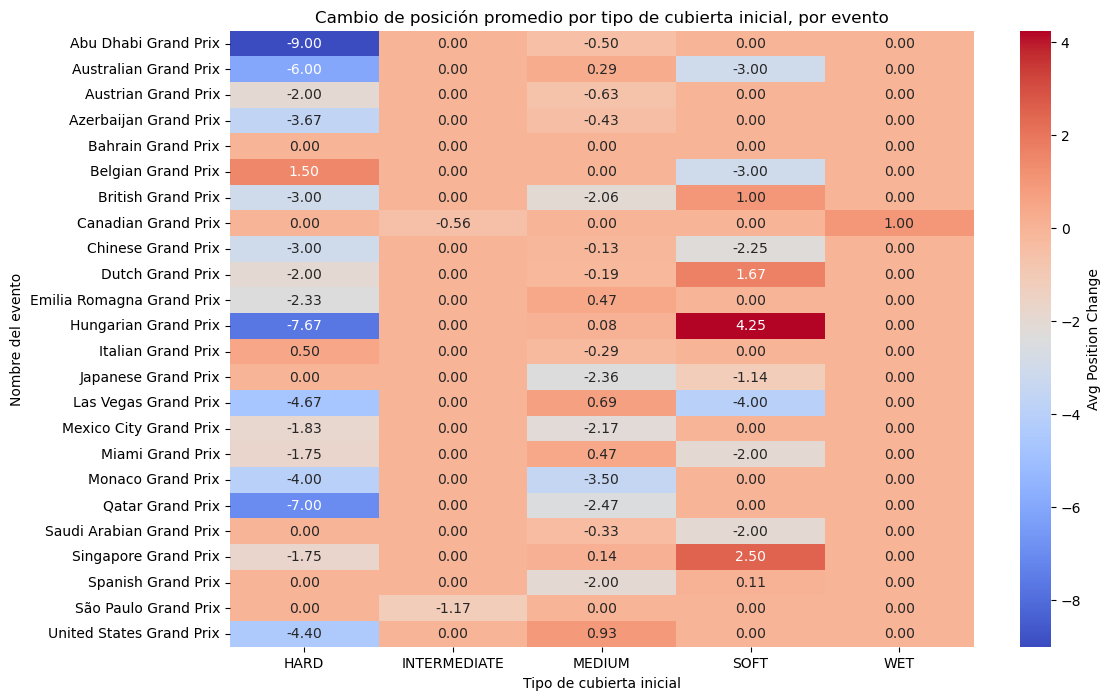

In [200]:

# Creamos una crosstab (promedio del cambio de posición)
tire_impact = pd.crosstab(index=result['EventName'], 
                          columns=result['Tyre_Compound_start'], 
                          values=result['Position_Change'], 
                          aggfunc='mean')

# Rellenamos NaN para visualización (NaN son nulos cuando no existe la combinación)
tire_impact_filled = tire_impact.fillna(0)


# Forzamos tipo numérico para graficar
tire_impact_filled = tire_impact_filled.astype(float)


# Hacemos el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tire_impact_filled, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Avg Position Change'})
plt.title('Cambio de posición promedio por tipo de cubierta inicial, por evento')
plt.xlabel('Tipo de cubierta inicial')
plt.ylabel('Nombre del evento')
plt.show()



#### Pregunta 2: ¿Hay pilotos que consistentemente mejoran su posición final con respecto a la posición de salida y otros que consistentemente empeoran?

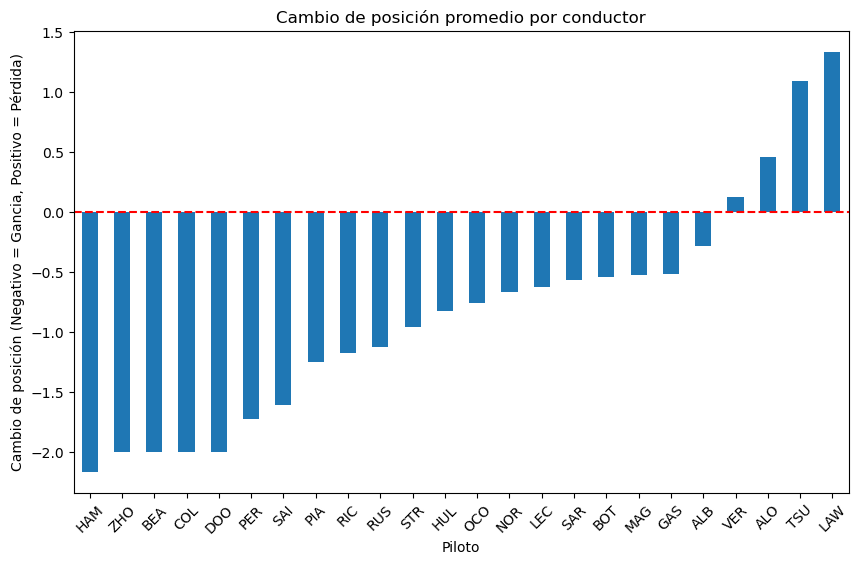

In [201]:
# Calcular cambio de posición promedio por conductor
driver_performance = result.groupby('Driver', observed= False)['Position_Change'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
driver_performance.plot(kind='bar')
plt.title('Cambio de posición promedio por conductor')
plt.xlabel('Piloto')
plt.ylabel('Cambio de posición (Negativo = Gancia, Positivo = Pérdida)')
plt.axhline(0, color='red', linestyle='--')
plt.xticks(rotation=45)
plt.show()
